In [1]:
import numpy as np
from librosa.core import cqt
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
from librosa.core import note_to_hz
import pandas as pd

import sys
sys.path.insert(0,'../')

import Spectrogram

import os
os.environ['CUDA_VISIBLE_DEVICES']='3'

if torch.cuda.is_available():
    device = "cuda:0"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [10]:
fs = 22050
# y_list = np.load('../y_list.npy')
s = np.linspace(0,10,fs*10)
y_list = np.sin(2*np.pi*250*s, dtype=np.float32) + np.sin(2*np.pi*280*s, dtype=np.float32) \
    + np.sin(2*np.pi*480*s, dtype=np.float32) + np.sin(2*np.pi*1600*s, dtype=np.float32)  
y_torch = torch.tensor(y_list, dtype=torch.float)

n_bins=60

mel_layer = Spectrogram.CQT1992(sr=fs, n_bins=n_bins, bins_per_octave=24, fmin=220, center=True)
spec = mel_layer(y_torch)

mel_layer = Spectrogram.CQT2010(sr=fs, n_bins=n_bins, bins_per_octave=24, fmin=220, center=True)
spec2010 = mel_layer(y_torch)


print("n_bins = ", n_bins, np.allclose(spec[0,:].cpu().numpy(), spec2010[0,:][:n_bins].cpu().numpy(), 1))

n_bins =  168 False


../Spectrogram.py:101: SyntaxWarning: The top bin 13679.169731442767Hz has exceeded the Nyquist frequency, please reduce the n_bins
  warnings.warn('The top bin {}Hz has exceeded the Nyquist frequency, please reduce the n_bins'.format(np.max(freqs)),SyntaxWarning)
../Spectrogram.py:101: SyntaxWarning: The top bin 13679.169731442771Hz has exceeded the Nyquist frequency, please reduce the n_bins
  warnings.warn('The top bin {}Hz has exceeded the Nyquist frequency, please reduce the n_bins'.format(np.max(freqs)),SyntaxWarning)


In [3]:
print(np.allclose(spec[0,:].cpu().numpy(), spec2010[0,:][:n_bins].cpu().numpy(), 4))

False


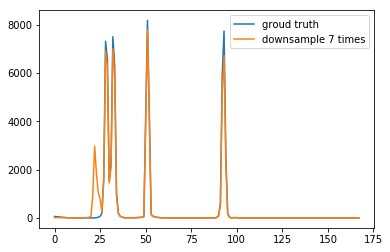

In [9]:
plt.plot(spec[0,:,10].cpu().numpy())
plt.plot(spec2010[0,:,10].cpu().numpy())
plt.legend(['groud truth', 'downsample 7 times'])

In [ ]:
def downsample
    s = low_pass_filtered_signal_by_half_target_sample_rate
    samples_to_discard = (sample_rate.to_f / target_sample_rate).floor //   (44100.0 / 8000.0).floor

    s1_n = 0
    for (n = 0; n < N; n++) {
     if (n % samples_to_discard == 0) {
       s1[s1_n] = averaged(n, samples_to_discard)
       s1_n += 1
    }
    }
end
 
def averaged(start_index, samples_to_discard)
  sum = 0
    for (n = start_index, n < start_index + samples_to_discard; n++) {
      sum += s[n] || 0
    }
  sum / samples_to_discard
end

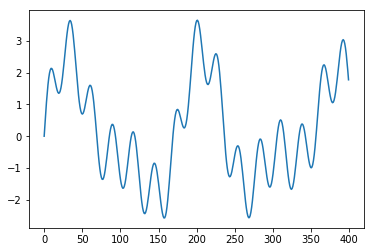

In [5]:
plt.plot(y_list[:400])

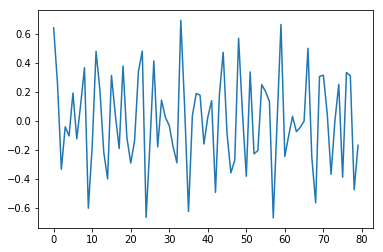

In [6]:
plt.plot(x_down[0,0].cpu().numpy()[:80])

In [7]:
spec[0,:].cpu().numpy().shape

(168, 862)

In [8]:
spec2010[0,:].cpu().numpy().shape

(168, 862)